<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/ev3MachineLearning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores Hiperparámetros: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 250}
MAE: 0.4131553232285744
MSE: 0.3204932007880555
RMSE: 0.5661211891353789
R²: 0.5944565023115829


<ipython-input-1-59c46e9d29a7>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="coolwarm", legend=False)


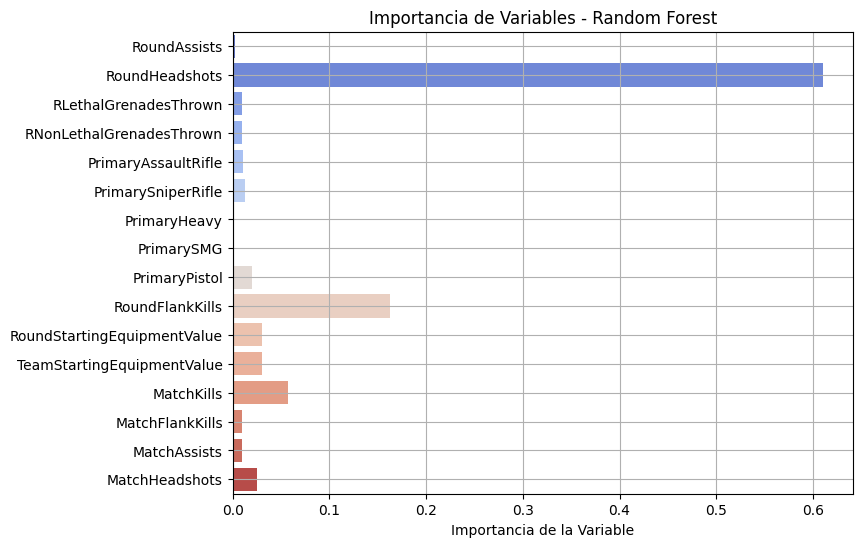

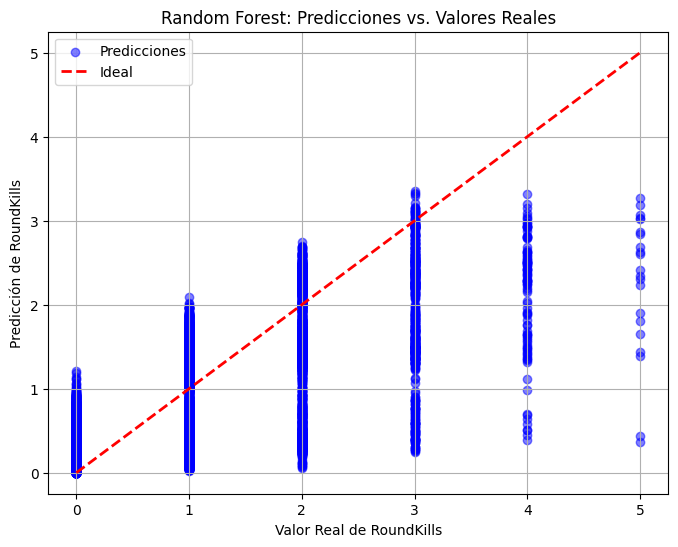

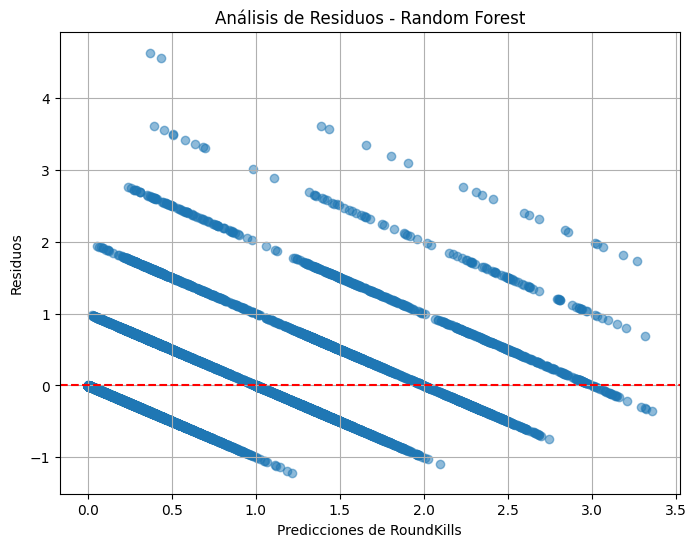

In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Paso 2: Cargar el dataset
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

# Paso 3: Selección de variables predictoras y objetivo
features = ['RoundAssists', 'RoundHeadshots', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
            'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
            'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
            'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots']

X = df[features]
y = df['RoundKills']

# Paso 4: Convertir todas las columnas a formato numérico antes del entrenamiento
for col in X.columns:
    X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')

# Paso 5: Manejo de valores NaN (relleno con la media)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Paso 6: Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 7: División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 8: Búsqueda de hiperparámetros con GridSearchCV (ajustado para menos tiempo de ejecución)
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_features': ['sqrt'],
    'max_depth': [10, 15],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [6, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Paso 9: Entrenar modelo optimizado con los nuevos hiperparámetros
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Paso 10: Predicción
y_pred = rf_model.predict(X_test)

# Paso 11: Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mejores Hiperparámetros:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Paso 12: Visualización de importancia de variables
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette="coolwarm", legend=False)
plt.xlabel("Importancia de la Variable")
plt.title("Importancia de Variables - Random Forest")
plt.grid(True)
plt.show()

# Paso 13: Gráfico de Dispersión (Predicción vs. Valores reales)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal")
plt.xlabel("Valor Real de RoundKills")
plt.ylabel("Predicción de RoundKills")
plt.title("Random Forest: Predicciones vs. Valores Reales")
plt.legend()
plt.grid(True)
plt.show()

# Paso 14: Gráfico de Residuos
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones de RoundKills")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos - Random Forest")
plt.grid(True)
plt.show()

Análisis de los resultados y métricas
Errores y precisión del modelo
 * MAE (Error absoluto promedio): 0.413 → El error promedio en la predicción es 0.41 kills, lo que muestra buena precisión.
 * MSE (Error cuadrático medio): 0.320 → La variabilidad del error es menor que en modelos previos.
 * RMSE (Raíz del error cuadrático medio): 0.566 → La dispersión del error es más controlada.
 * R² (Coeficiente de determinación): 0.594 → El modelo explica el 59.4% de la variabilidad en RoundKills, siendo más preciso que regresión lineal y árboles de decisión.

Conclusión sobre métricas:

El modelo tiene el mejor rendimiento hasta ahora, con menos error y mayor precisión en comparación con regresión múltiple y árboles de decisión.

Gráfico de comparación (Predicciones vs. Valores reales)
Este gráfico muestra cómo las predicciones de Random Forest (puntos azules) se comparan con los valores reales (línea roja discontinua que representa una predicción perfecta).
* Los puntos están bastante cerca de la línea roja, lo que indica buena precisión en la predicción de RoundKills.
* Hay cierta dispersión, lo que sugiere que el modelo podría mejorar aún más con ajustes en los hiperparámetros.
* En general, las predicciones siguen la tendencia de los datos reales, mostrando que el modelo aprende bien.

Gráfico de residuos (Errores del modelo)
Este gráfico muestra la diferencia entre las predicciones y los valores reales.
* La mayoría de los errores oscila entre -1 y 4, lo que indica una ligera variabilidad en las predicciones.
* Algunos residuos tienen patrón diagonal, lo que podría indicar que el modelo subestima o sobreestima ciertos valores.
* El error es relativamente estable, lo que significa que el modelo no comete errores graves, pero aún podría afinarse.

Conclusión:
El modelo funciona bien, pero algunos ajustes en la profundidad de los árboles (max_depth) o cantidad de estimadores (n_estimators) podrían mejorar la precisión aún más.

Conclusión final: ¿Cómo se compara con otros modelos?
*  Mejor que regresión lineal simple: Captura relaciones más complejas y reduce el error.
*  Mejor que regresión lineal múltiple: Usa árboles en lugar de ecuaciones lineales, lo que mejora la precisión.
*  Mejor que un solo árbol de decisión: Promedia múltiples árboles, evitando sobreajuste y errores grandes.
* Random Forest tiene el mejor rendimiento hasta ahora, con R² = 0.594, lo que indica buen poder predictivo sobre RoundKills.